<a href="https://colab.research.google.com/github/joaopaulo-eng/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Santiago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Santiago - Chile*
---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Santiago, capital chilena, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Santiago (good for visualisations).*

Com isso em mente, vamos ao projeto.

Aqui apresento dois modos para realizar a importação do arquivo `.csv`.

O primeiro modo é mais prático, somente com o link de endereço do arquivo já é possível realizar a análise dos dados. No entanto, podemos perder as informações em uma eventual mudança do site.

In [104]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

%matplotlib inline

# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/chile/rm/santiago/2021-12-25/visualisations/listings.csv')

A segunda maneira é realizada baixando o arquivo diretamente na máquina e depois realizando a importação para o ambiente do Google Colab. É um método um pouco mais complicado mas que garante que tenhamos sempre os resultados para mostrar.

In [105]:
#from google.colab import files
#uploaded = files.upload()

# importar o arquivo listings.csv para um DataFrame
#df = pd.read_csv(io.BytesIO(uploaded['listings.csv']))

Logo após a importação dos dados é de praxe realizar a visualização das primeiras cincos entradas do nosso *dataset*. Este primeiro contato tem por objetivo situar e nos guiar para os próximo passos.

In [106]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30950,"Apartment Providencia, Santiago",132845,Pamela,NaN,Providencia,-33.43174,-70.61845,Entire home/apt,260000,180,12,2021-08-30,0.22,1,276,4,NaN
1,49392,Share my Flat in Providencia,224592,Maria,NaN,Providencia,-33.43266,-70.60072,Private room,45652,3,0,NaN,NaN,2,176,0,NaN
2,52811,Suite Providencia 1 Santiago Chile,244792,Cristián,NaN,Providencia,-33.42959,-70.61880,Entire home/apt,46513,1,46,2021-11-04,0.34,3,89,1,NaN
3,53494,depto centro ski el colorado chile,249097,Paulina,NaN,Lo Barnechea,-33.34344,-70.29432,Entire home/apt,149999,2,38,2021-05-22,0.57,1,266,1,NaN
4,55303,Plaza Lyon piso 3,261079,Hernan,NaN,Providencia,-33.42250,-70.60920,Entire home/apt,70000,2,2,2016-11-28,0.03,3,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [107]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0])) # df.shape[0] nos retorna a quantidade de entradas no DataFrame
print("Variáveis:\t {}\n".format(df.shape[1])) # df.shape[1] nos retorna a quantidade de colunas no DataFrame

# visualizar as variáveis e os tipos de dados no DataFrame
df.dtypes

Entradas:	 9139
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

É possível afirmar que nosso *DataFrame* possui 9139 entradas - linhas - e 18 variáveis - colunas.

Outra maneira de realizar isso é utilizando a função `df.info()`.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9139 entries, 0 to 9138
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9139 non-null   int64  
 1   name                            9135 non-null   object 
 2   host_id                         9139 non-null   int64  
 3   host_name                       9135 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9139 non-null   object 
 6   latitude                        9139 non-null   float64
 7   longitude                       9139 non-null   float64
 8   room_type                       9139 non-null   object 
 9   price                           9139 non-null   int64  
 10  minimum_nights                  9139 non-null   int64  
 11  number_of_reviews               9139 non-null   int64  
 12  last_review                     58

## Análise dos Dados
Com as variáveis listadas vamos montar um dicionário para guiar as avaliações.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [109]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.988401
reviews_per_month                 0.356604
last_review                       0.356604
host_name                         0.000438
name                              0.000438
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* A coluna `license` possui cerca de 99% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em cerca de 35% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,04% dos valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para analisar as distribuições das variáveis a melhor ferramenta que temos é a plotagem do gráfico de *histograma*

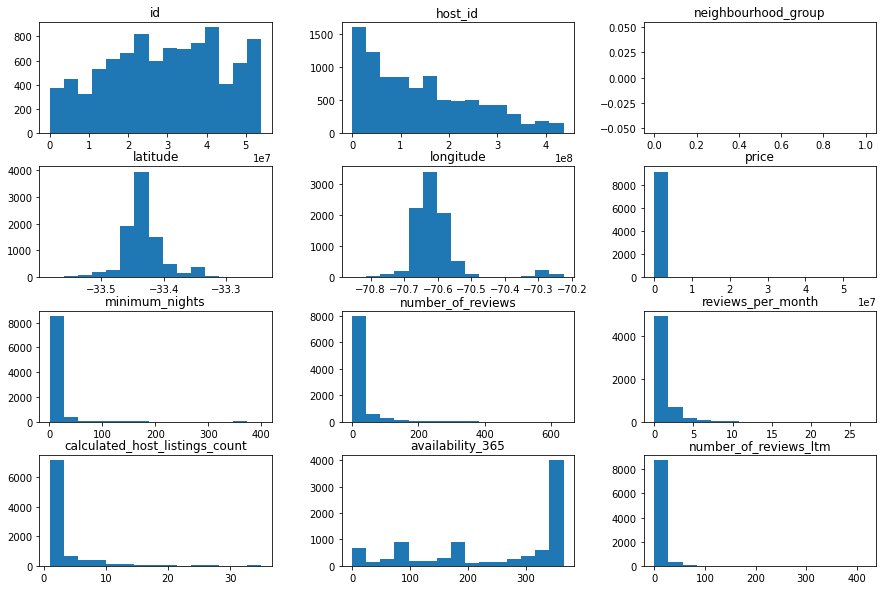

In [110]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10), grid=False);

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.'

In [111]:
# ver a média da coluna price
print(f'A média de preços de aluguel em Santiago é de CLP$ {df.price.mean():.2f}')

A média de preços de aluguel em Santiago é de CLP$ 79990.07


CLP$ 79990.07 correponde a R\$ 521.31, no entanto, esta média de preço para se hospedar num imóvel em Santiago está distorcido devido a presença de *outliers*.

Vamos executar a limpeza nestes dados e então apresentaremos um novo valor de preço médio.

In [112]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9.139000e+03,9139.000000,9139.000000,5880.000000,9139.000000,9139.000000
mean,7.999007e+04,7.251231,17.942554,0.910160,3.025605,248.003830
std,8.707143e+05,26.967635,40.411300,1.378244,4.312533,127.789544
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.153400e+04,1.000000,0.000000,0.110000,1.000000,142.000000
50%,3.500000e+04,2.000000,2.000000,0.400000,1.000000,319.000000
75%,5.400000e+04,3.000000,16.000000,1.150000,3.000000,364.000000
max,5.598833e+07,400.000000,638.000000,27.000000,35.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de CLP\$ 54 000 (R\$ 351,93), porém seu valor máximo é CLP\$ 55 988 330 (R\$ 364 888,49).
* A variável `minimum_nights` tem como seu máximo valor 400, sendo que 75% dos valores estão abaixo de 3. 

Claramente temos outliers nessas variáveis.

#### Boxplot para minimum_nights

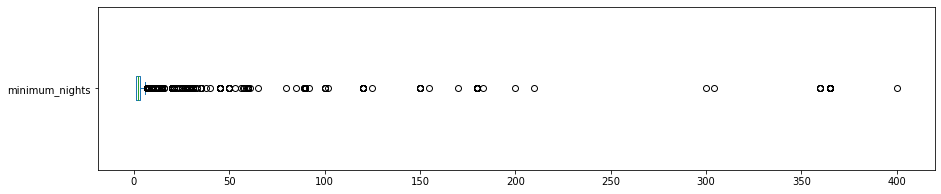


minimum_nights: valores acima de 30:

247 entradas
2.7027%


In [113]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("\nminimum_nights: valores acima de 30:\n")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

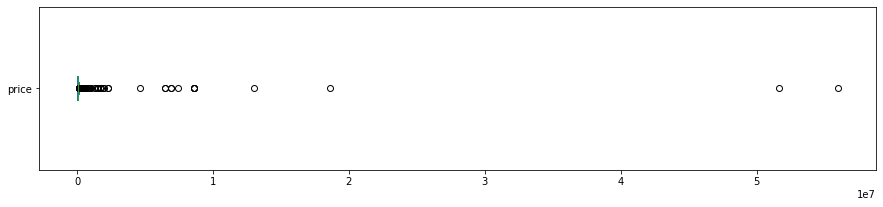


price: valores acima de 60000

1876 entradas
20.5274%


In [114]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 60000 pesos chilenos para price
print("\nprice: valores acima de 60000\n")
print("{} entradas".format(len(df[df.price > 60000])))
print("{:.4f}%".format((len(df[df.price > 60000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.


Dataset antes da limpeza: 9139
Dataset após da limpeza: 7075
Os outliers eliminados representam 22.58% do dataset



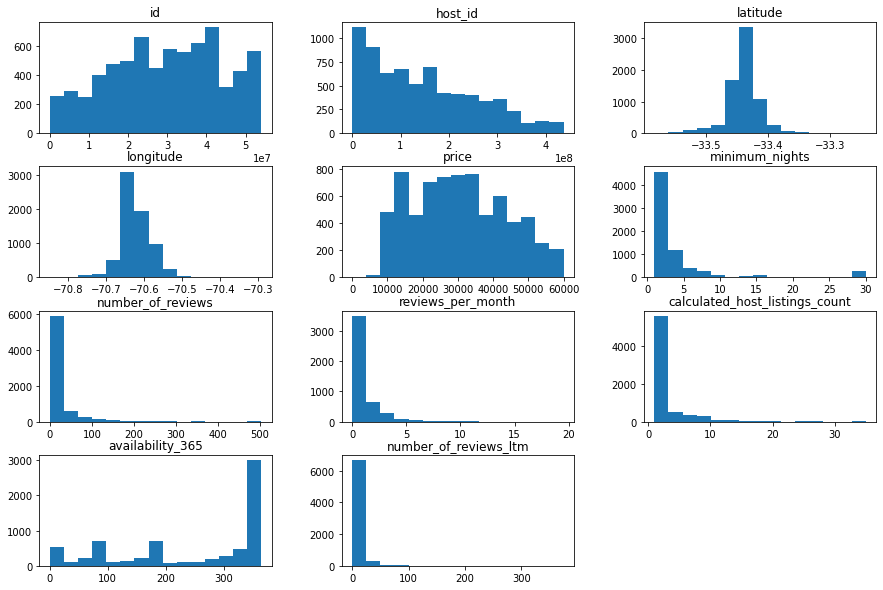

In [115]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 60000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10), grid=False);

print(f'\nDataset antes da limpeza: {df.shape[0]}')
print(f'Dataset após da limpeza: {df_clean.shape[0]}')
print(f'Os outliers eliminados representam {((df.shape[0] - df_clean.shape[0]) / df.shape[0] * 100):.2f}% do dataset\n')

####Verificando conjunto limpo x conjunto original

De maneira gráfica será mostrado o conjunto de dados das variáveis price e minimum_nights antes da limpeza e como ficou após a limpeza.

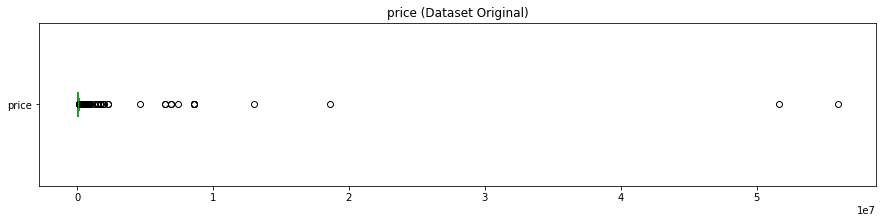

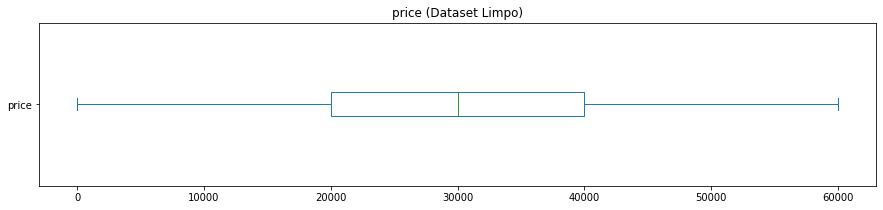

In [116]:
#boxplot price original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False)
ax.set_title('price (Dataset Original)')
plt.show()

# boxplot price limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False)
ax.set_title('price (Dataset Limpo)')
plt.show()

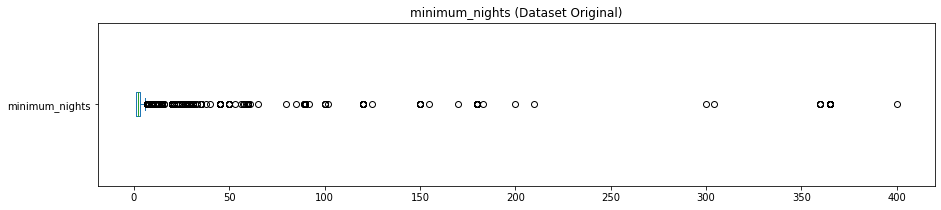

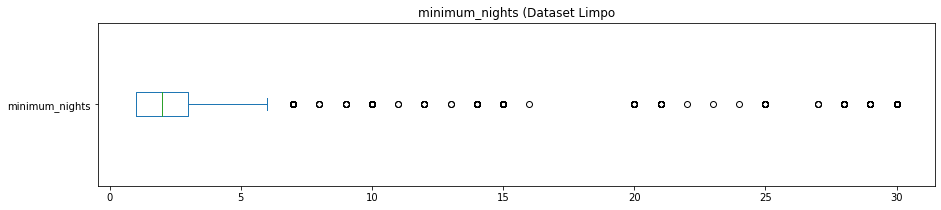

In [117]:
#boxplot minimum_nights original
fig, ax = plt.subplots(figsize=(15, 3))
df.minimum_nights.plot(kind='box', vert=False)
ax.set_title('minimum_nights (Dataset Original)')
plt.show()

# boxplot minimum_nights limpo
fig, ax = plt.subplots(figsize=(15, 3))
df_clean.minimum_nights.plot(kind='box', vert=False)
ax.set_title('minimum_nights (Dataset Limpo')
plt.show()

Aqui é possível ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers na variável price, entretanto, esses estão sendo calculados em relação ao novo dataset, e a limpeza levou em consideração os quartis do dado original.

Para garantir que não tenha outliers que vão prejudicar a análise, será feito uma nova checagem nos histogramas das duas variáveis.

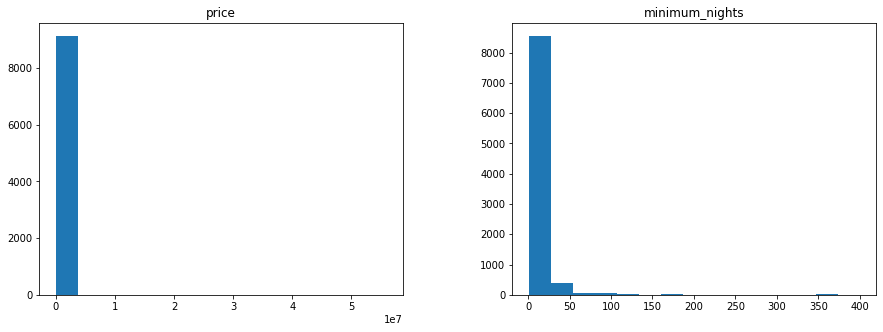

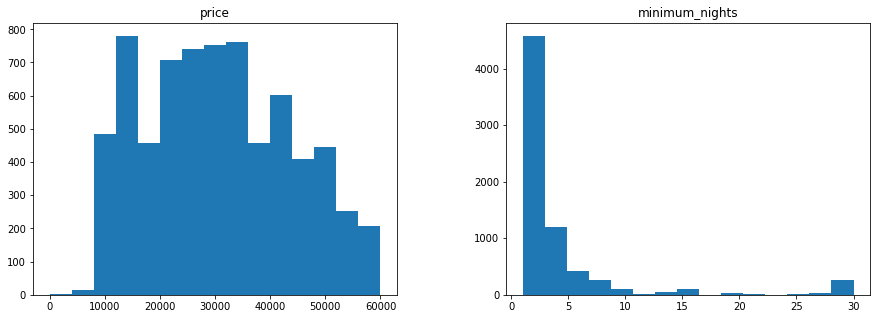

In [118]:
# histograma price e minimum_nights Originais
df[['price', 'minimum_nights']].hist(bins=15, figsize=(15, 5), grid=False);
# histograma price e minimum_nights Limpos
df_clean[['price', 'minimum_nights']].hist(bins= 15, figsize=(15, 5), grid=False);

####Qual o custo médio para se hospedar em Santiago?

Após o tratamento dos dados temos um valor mais fidedigno. 

In [119]:
# ver a média da coluna price
print(f'A média de preços de aluguel em Santiago é de CLP$ {df_clean.price.mean():.2f}')

A média de preços de aluguel em Santiago é de CLP$ 30460.72


O equivalente a R$ 197.76

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [120]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.078290,0.081659,0.126982,0.162160,0.057432
minimum_nights,-0.078290,1.000000,0.007316,-0.098463,-0.050353,-0.066366
number_of_reviews,0.081659,0.007316,1.000000,0.651608,0.083230,-0.066725
reviews_per_month,0.126982,-0.098463,0.651608,1.000000,0.152970,0.051876
calculated_host_listings_count,0.162160,-0.050353,0.083230,0.152970,1.000000,0.099611
availability_365,0.057432,-0.066366,-0.066725,0.051876,0.099611,1.000000


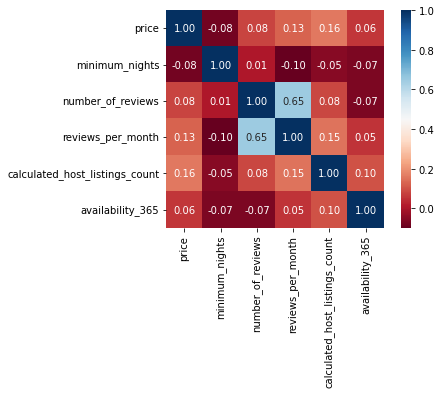

In [121]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [122]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3644
Private room       3210
Shared room         174
Hotel room           47
Name: room_type, dtype: int64

In [123]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0] * 100

Entire home/apt    39.873071
Private room       35.124193
Shared room         1.903928
Hotel room          0.514279
Name: room_type, dtype: float64

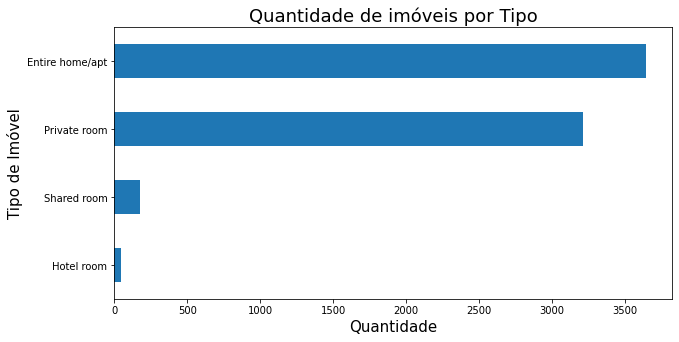

In [124]:
# mostrar a quantidade de cada tipo de imóvel disponível (Gráfico horizontal)
df_clean.room_type.value_counts(ascending=True).plot.barh(figsize=(10,5))
plt.title('Quantidade de imóveis por Tipo', fontsize=18)
plt.xlabel('Quantidade', fontsize=15)
plt.ylabel('Tipo de Imóvel', fontsize=15);

### **Q7. Qual a localidade mais cara de Santiago?**


Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



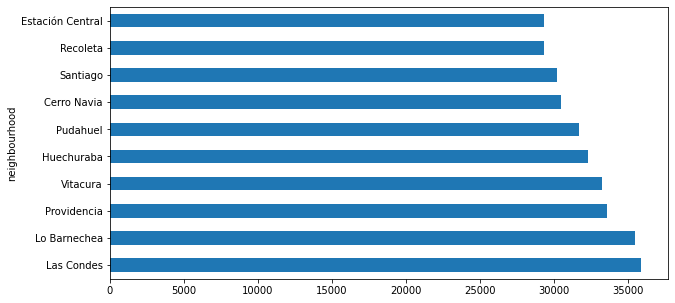

In [135]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10].plot.barh(figsize=(10,5));

In [131]:
# quantidade de locações para os 3 bairros mais caros
Las_Condes   = df_clean[df_clean['neighbourhood'] == 'Las Condes'].shape[0]
Lo_Barnechea   = df_clean[df_clean['neighbourhood'] == 'Lo Barnechea'].shape[0]
Providencia = df_clean[df_clean['neighbourhood'] == 'Providencia'].shape[0]
print(f'Las Condes: {Las_Condes} Locações\nLo Barnechea: {Lo_Barnechea} Locações\nProvidencia: {Providencia} Locações\n')

Las Condes: 976 Locações
Lo Barnechea: 56 Locações
Providencia: 1374 Locações



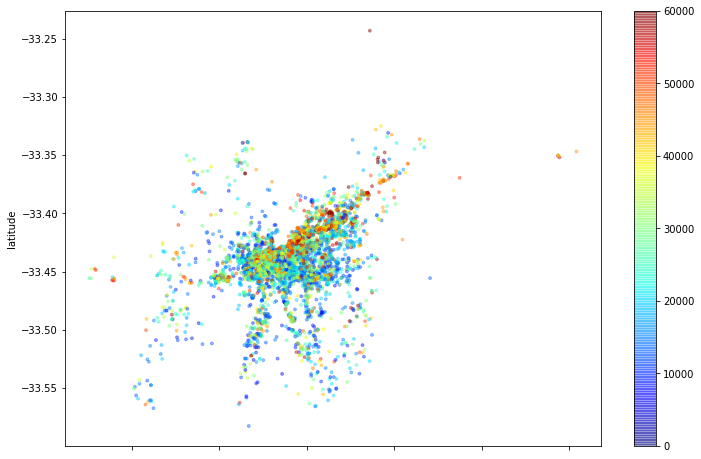

In [132]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.